In [1]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [3]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=1000, random_state=42, stratify=df['Churn'])

In [10]:
from pycaret.classification import *

# Initialize setup
clf_setup = setup(
    data=train_df,
    target='Churn',
    session_id=42,
    train_size=0.8
)

# Compare models
best_models = compare_models(n_select=3)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(6043, 21)"
5,Transformed data shape,"(6043, 42)"
6,Transformed train set shape,"(4834, 42)"
7,Transformed test set shape,"(1209, 42)"
8,Numeric features,3
9,Categorical features,17


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7689,0.7811,0.7689,0.7619,0.7646,0.3867,0.3880,0.0840
lr,Logistic Regression,0.7451,0.8353,0.7451,0.7376,0.6557,0.0767,0.1567,0.1430
ridge,Ridge Classifier,0.7391,0.7884,0.7391,0.6942,0.6531,0.0665,0.1192,0.0760
et,Extra Trees Classifier,0.7371,0.6964,0.7371,0.7057,0.6341,0.0256,0.0774,0.1170
nb,Naive Bayes,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.0660
dt,Decision Tree Classifier,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.0660
rf,Random Forest Classifier,0.7346,0.7638,0.7346,0.5396,0.6222,0.0000,0.0000,0.1250
ada,Ada Boost Classifier,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.0660
gbc,Gradient Boosting Classifier,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.1130
lda,Linear Discriminant Analysis,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.0690


c:\Users\Benja\Documents\Projects\techcat\py311\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


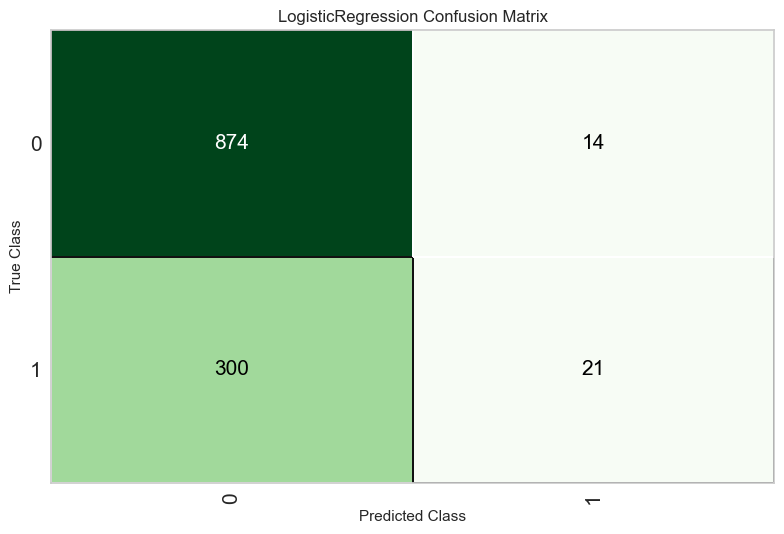

In [11]:
plot_model(best_models[1], plot='confusion_matrix')

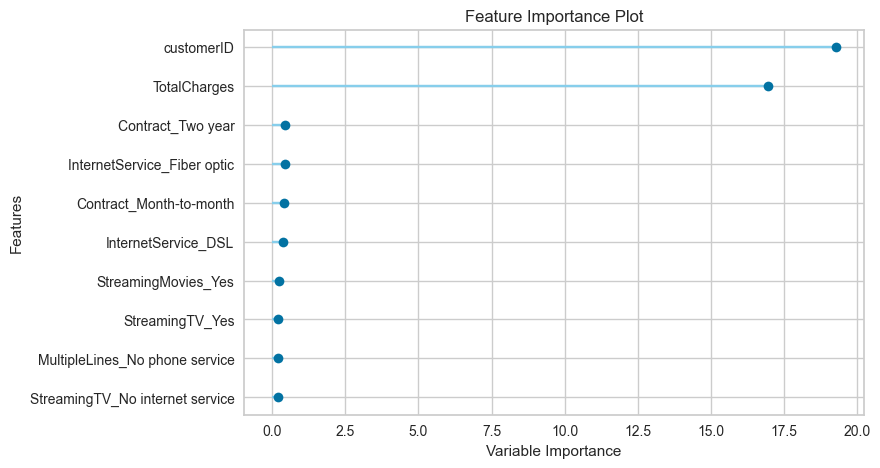

In [12]:
plot_model(best_models[1], plot='feature')

In [14]:
predictions = predict_model(best_models[1], data=test_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7460,0.8345,0.7460,0.7500,0.6557,0.0759,0.1649


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
4589,1494-EJZDW,Female,0,Yes,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.150000,220.8,No,No,0.9535
524,8397-MVTAZ,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,100.050003,3480,Yes,No,0.6877
4281,8582-KRHPJ,Male,0,No,No,50,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,35.000000,1782.4,No,No,0.6446
4441,4825-FUREZ,Male,0,Yes,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Electronic check,20.250000,835.5,No,No,0.9670
6478,9330-VOFSZ,Female,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,Yes,Credit card (automatic),110.800003,6640.7,No,No,0.9317
